TypeError: Input z must be 2D, not 1D

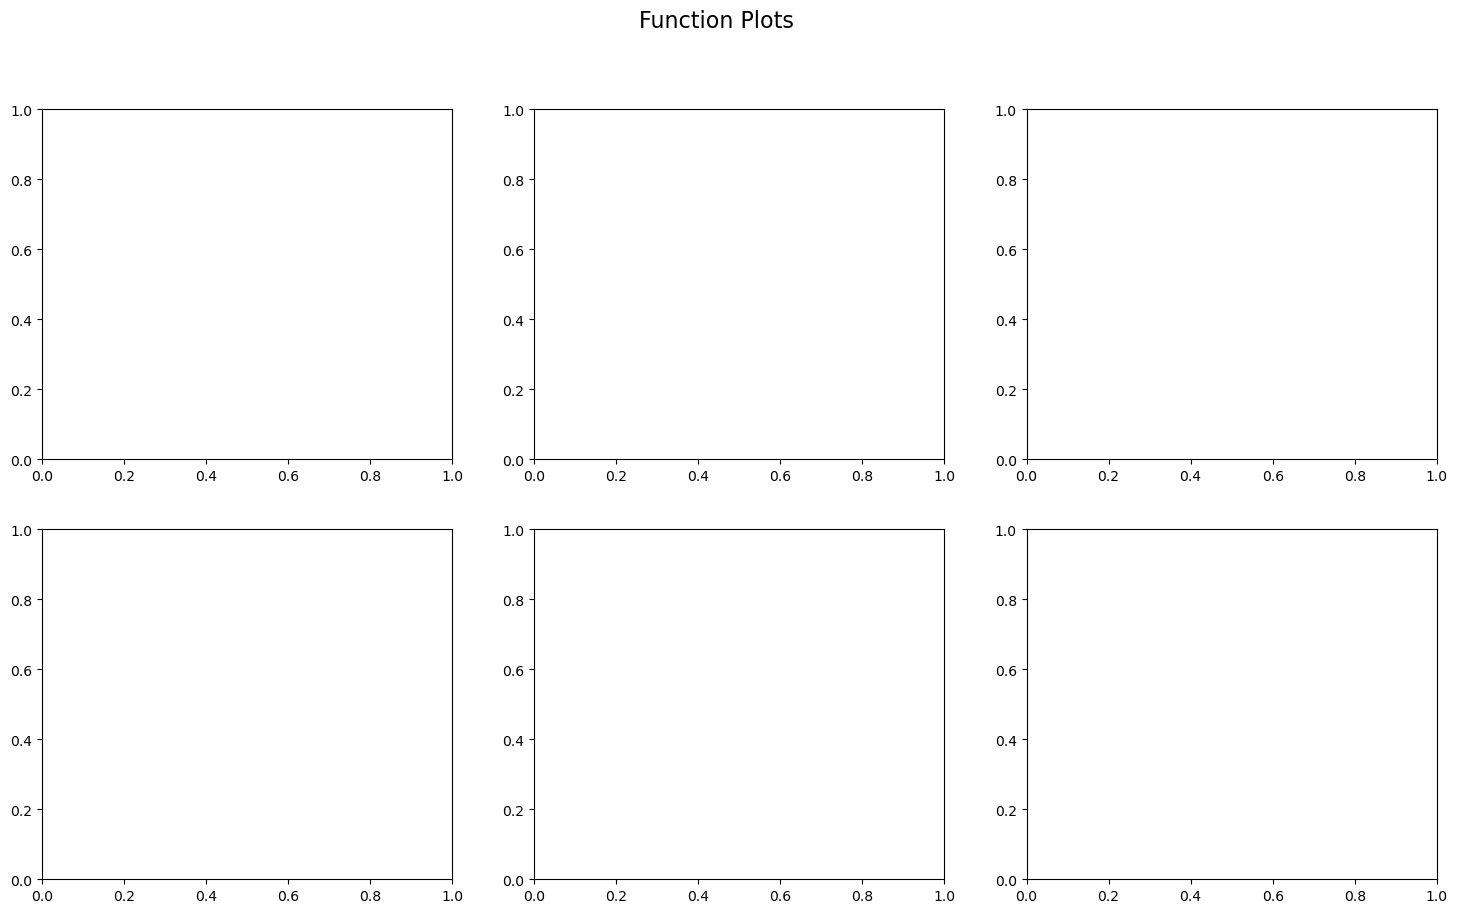

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd


class Function:
    """
    Base class for representing a mathematical function.
    """
    def __init__(self, name):
        self.name = name

    def evaluate(self, x, y):
        """
        Abstract method to be implemented by subclasses for function evaluation.

        Args:
            x: x-coordinate value.
            y: y-coordinate value.

        Returns:
            The function value at (x, y).
        """
        raise NotImplementedError("Subclasses must implement evaluate method")


class Rosenbrock(Function):
    """
    Represents the Rosenbrock function.
    """
    def __init__(self):
        super().__init__("Rosenbrock")

    def evaluate(self, x, y):
        return (1 - x) ** 2 + 100 * (y - x**2) ** 2


class Rastrigin(Function):
    """
    Represents the Rastrigin function.
    """
    def __init__(self):
        super().__init__("Rastrigin")

    def evaluate(self, x, y):
        a = 20
        b = 0.2
        c = 2 * np.pi
        sum_sq_term = -0.5 * (x**2 + y**2)
        cos_term = np.cos(c * x) + np.cos(c * y)
        return -a * np.exp(b * np.sqrt(sum_sq_term / 2)) - np.exp(cos_term / 2) + a + np.e


class FunctionPlotter:
    """
    Class for plotting functions in 2D and 3D.
    """
    def __init__(self, figsize=(18, 10)):
        self.fig, self.axes = plt.subplots(2, 3, figsize=figsize)
        self.fig.suptitle('Function Plots', fontsize=16)

    def plot_function_2d(self, func, x, y, ax, cmap='viridis', label=None):
        X = x
        Y = y
        Z = func.evaluate(X, Y)
        ax.contourf(X, Y, Z, levels=50, cmap=cmap)
        if label:
            ax.plot(x, func.evaluate(x, y), color='red', label=label)
        ax.set_title(f"{func.name} Function 2D")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        if label:
            ax.legend()

    def plot_function_3d(self, func, x, y, ax, cmap='viridis'):
        Z = func.evaluate(X, Y)
        ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none')
        ax.set_title(f"{func.name} Function 3D")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    def plot_all_functions(self, data):
        x = data['x'].to_numpy()
        y = data['y'].to_numpy()

        # Generate meshgrid data
        global X, Y
        X, Y = np.meshgrid(np.linspace(-5.15, 5.15, 100), np.linspace(-5.15, 5.15, 100))

        # Create function objects
        rosenbrock_func = Rosenbrock()
        rastrigin_func = Rastrigin()

        # Plot Rosenbrock function
        self.plot_function_2d(rosenbrock_func, x, y, self.axes[0, 0], label='Rosenbrock')
        self.plot_function_3d(rosenbrock_func, x, y, self.axes[1, 0])



# Criação das funções
rosenbrock_func = Rosenbrock()
rastrigin_func = Rastrigin()

# Criação do objeto para plotagem
plotter = FunctionPlotter()

# Geração dos dados
data = pd.DataFrame(
    {
        'x': np.linspace(-5, 5, 400),
        'y': np.linspace(-5, 5, 400)
    }
)

# Plotagem das funções em 2D
plotter.plot_function_2d(rosenbrock_func, data['x'], data['y'], plotter.axes[0, 0], label='Rosenbrock Line')
plotter.plot_function_2d(rastrigin_func, data['x'], data['y'], plotter.axes[0, 1], label='Rastrigin Line')

# Plotagem das funções em 3D
plotter.plot_function_3d(rosenbrock_func, data['x'], data['y'], plotter.axes[1, 0])
plotter.plot_function_3d(rastrigin_func, data['x'], data['y'], plotter.axes[1, 1])

# Ajuste do layout e exibição do gráfico
plt.tight_layout()
plt.show()

